In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

/Users/Benforbes/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


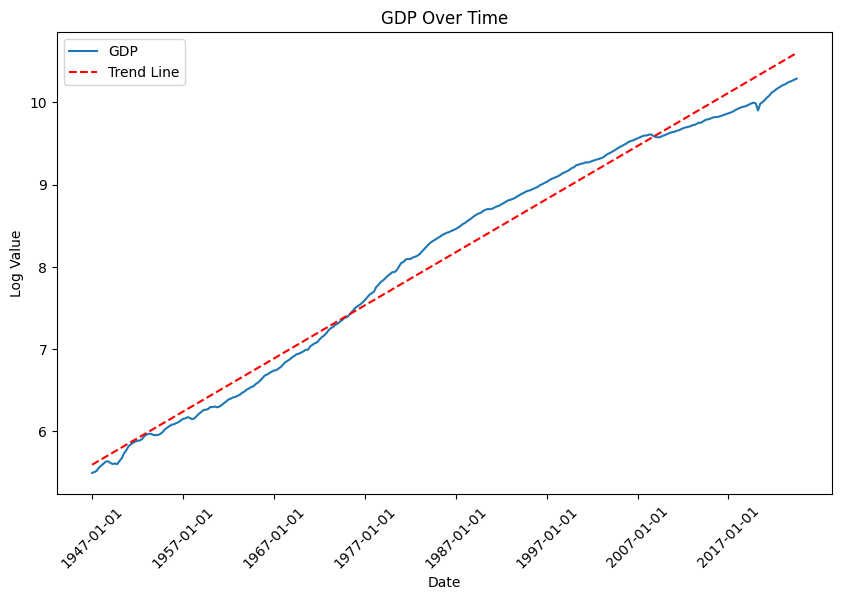

In [12]:
API_KEY = "b53b0448a438efe7498dcaa460e42c67"

BASE_URL = "https://api.stlouisfed.org/fred/series/observations"

# Parameters for the API call
params = {
    "series_id": "GDP",  # Example: Get data for GDP
    "api_key": API_KEY,
    "file_type": "json"  # Response format
}

response = requests.get(BASE_URL, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Extract observations
    observations = data.get("observations", [])
    # Convert to DataFrame for analysis
    df = pd.DataFrame(observations)
else:
    print(f"Error: {response.status_code}")

# Convert the 'value' column to numeric, forcing errors to NaN
df["value"] = pd.to_numeric(df["value"], errors='coerce')

# Drop rows with NaN values in the 'value' column
df.dropna(subset=["value"], inplace=True)

# Plot the data with x-axis labels once every 10 years
plt.figure(figsize=(10, 6))
plt.plot(df["date"], np.log(df["value"]), label='GDP')

# Add a straight trend line
z = np.polyfit(range(len(df["value"])), np.log(df["value"]), 1)
p = np.poly1d(z)
plt.plot(df["date"], p(range(len(df["value"]))), "r--", label='Trend Line')

plt.xlabel("Date")
plt.ylabel("Log Value")
plt.title("GDP Over Time")

# Set x-axis labels to show once every 10 years
plt.xticks(np.arange(0, len(df["date"]), step=40), df["date"][::40], rotation=45)

plt.legend()
plt.show()